# Exercício sobre sobreajuste.

Vimos que o sobreajuste ocorre quando o conjunto de treinamento é pequeno e o modelo possui capacidade (i.e., flexibilidade) superior à necessária para uma boa aproximação dos dados.

No nosso exemplo, vimos isso acontecer com dados ruidosos.

Entretanto, o que aconteceria se as amostras ainda fossem poucas, mas não estivessem contaminadas com ruído e o modelo ainda tivesse flexibilidade superior à necessária?

O sobreajuste ocorreria?

**Justifique todas as suas respostas**

Use este notebook para realizar alguns testes e chegar a uma conclusão.

In [13]:
import pandas as pn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler

## Gerando o conjunto de dados

In [14]:
seed = 42
np.random.seed(seed)

In [15]:
N = 11

x = np.linspace(0, 1, N).reshape(N, 1)

y = -1 + 2*x

w = np.sqrt(0.05)*np.random.randn(N, 1)

y_noisy = y + w

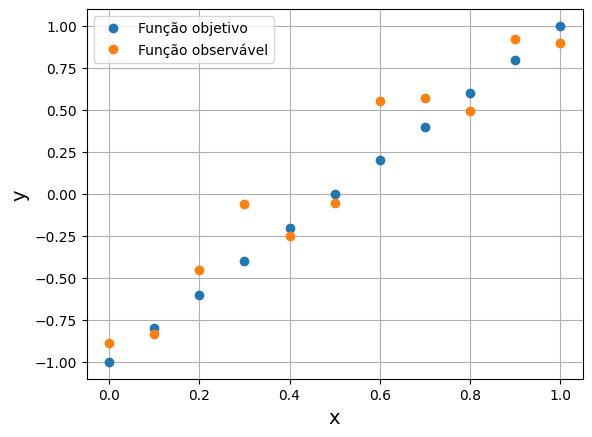

In [16]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

## Regressão com polinômio de ordem 1 (i.e., reta)

In [17]:
degree = 1

# Use pipeline to perform these steps in sequence
pipe_seq1 = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
]

pipe1 = Pipeline(pipe_seq1)

# train the model using x and y
pipe1.fit(x, y_noisy.ravel())

# predict output for x
y_pred1 = pipe1.predict(x)

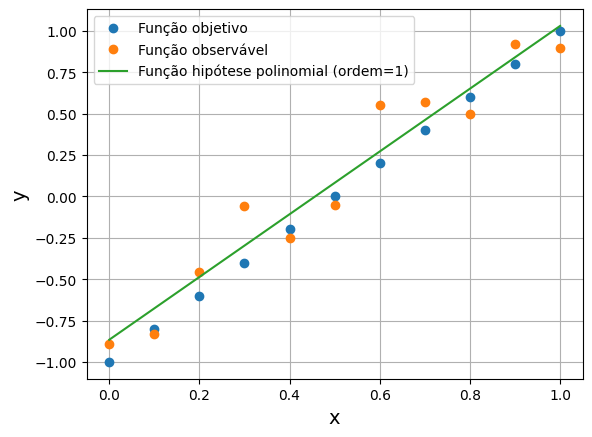

In [18]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x, y_pred1, label='Função hipótese polinomial (ordem=1)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Generalizando

In [19]:
N = 1000

x_new = np.linspace(0, 1, N).reshape(N, 1)

# Predict output for x
y_pred_new = pipe1.predict(x_new)

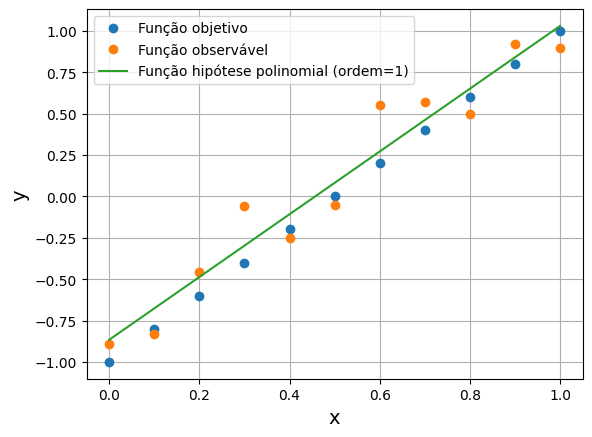

In [20]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x_new, y_pred_new, label='Função hipótese polinomial (ordem=1)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

## Regressão com polinômio de ordem 11 (mesmo número de amostras)

In [21]:
degree = 11

# Use pipeline to perform these steps in sequence
pipe_seq11 = [
    ('poly', PolynomialFeatures(degree=degree)),
    ('scaler', StandardScaler()),
    ('reg', LinearRegression())
]

pipe11 = Pipeline(pipe_seq11)

# train the model using X and y
pipe11.fit(x, y_noisy.ravel())

# predict output for X
y_pred11 = pipe11.predict(x)

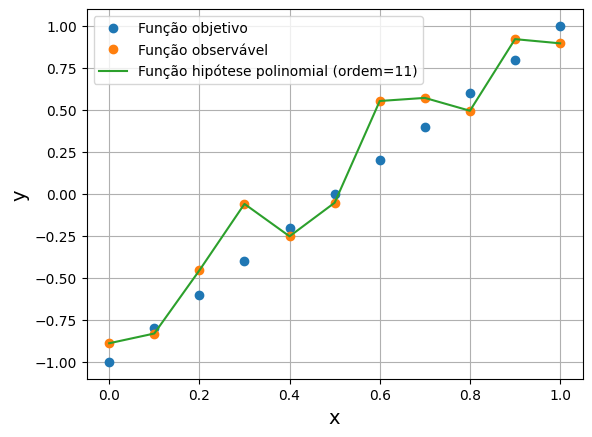

In [22]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x, y_pred11, label='Função hipótese polinomial (ordem=11)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()

### Generalizando

In [23]:
N = 1000

x_new = np.linspace(0, 1, N).reshape(N, 1)

# Predict output for x
y_pred_new = pipe11.predict(x_new)

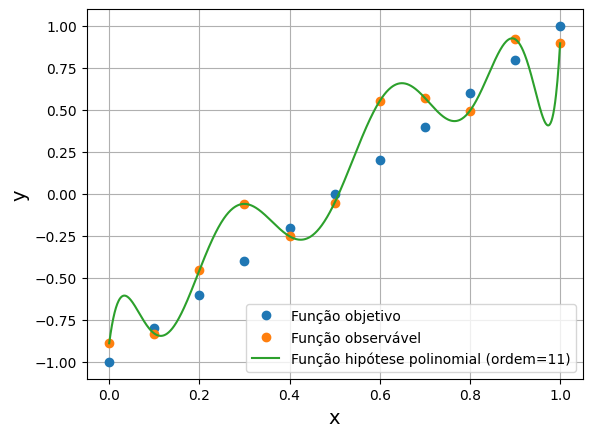

In [24]:
plt.plot(x, y, 'o', label='Função objetivo')
plt.plot(x, y_noisy, 'o', label='Função observável')
plt.plot(x_new, y_pred_new, label='Função hipótese polinomial (ordem=11)')
plt.grid()
plt.xlabel('x', fontsize=14)
plt.ylabel('y', fontsize=14)
plt.legend()
plt.show()